In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("takamotoki/jra-horse-racing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/satoki252595/.cache/kagglehub/datasets/takamotoki/jra-horse-racing-dataset/versions/1


In [6]:
import kagglehub
import pandas as pd
import zipfile
import os

# 1. データセットのダウンロード
dataset_identifier = "takamotoki/jra-horse-racing-dataset"
download_path = kagglehub.dataset_download(dataset_identifier)

# ダウンロードされたファイルの拡張子を確認
if download_path.endswith('.zip'):
    # 2. ZIPファイルの解凍
    extract_dir = 'jra_horse_racing_data'
    with zipfile.ZipFile(download_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
else:
    extract_dir = os.path.dirname(download_path)

# 3. CSVファイルの検索
# ディレクトリ内のファイルを一覧表示し、CSVファイルを特定
csv_files = []
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

# 複数のCSVファイルが存在する場合、それぞれを読み込む
# ここでは例として最初のCSVファイルを読み込みます
if csv_files:
    df_laptime = pd.read_csv(csv_files[0],encoding='utf-8')  # エンコーディングはデータに応じて変更
    df_raceResult = pd.read_csv(csv_files[1],encoding='utf-8')
    df_odds = pd.read_csv(csv_files[2],encoding='utf-8')
    df_corner = pd.read_csv(csv_files[3],encoding='utf-8')
else:
    print("CSVファイルが見つかりませんでした。データセットの構造を確認してください。")

/var/folders/0b/kvbdjp6d6kl4v5f97xnk5h480000gn/T/ipykernel_74211/95054170.py:31: DtypeWarning: Columns (8,11,15,16,17,18,19,20,21,22,23,24,25,26,27,34,36,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raceResult = pd.read_csv(csv_files[1],encoding='utf-8')


In [7]:
df_raceResult['枠番']

0          2
1          3
2          5
3          6
4          7
          ..
1626806    7
1626807    5
1626808    3
1626809    8
1626810    6
Name: 枠番, Length: 1626811, dtype: int64

In [8]:
df_raceResult[df_raceResult['距離(m)']>=2500]

,レース馬番ID,レースID,レース日付,開催回数,競馬場コード,競馬場名,開催日数,競争条件,レース記号/[抽],レース記号/(馬齢),...,4コーナー,上り,単勝,人気,馬体重,場体重増減,東西・外国・地方区分,調教師,馬主,賞金(万円)
1722,19860201020907,198602010209,1986-08-03,1,2,函館,2,4歳以上900万下,NaN,(馬齢),...,4.0,37.7,5.8,3.0,420.0,8.0,東,大久保洋,メジロ商事,890.0
1723,19860201020905,198602010209,1986-08-03,1,2,函館,2,4歳以上900万下,NaN,(馬齢),...,1.0,37.9,5.9,4.0,460.0,12.0,東,阿部新生,金指利明,360.0
1724,19860201020902,198602010209,1986-08-03,1,2,函館,2,4歳以上900万下,NaN,(馬齢),...,4.0,37.7,6.4,5.0,484.0,4.0,西,中尾正,伊吹,220.0
1725,19860201020903,198602010209,1986-08-03,1,2,函館,2,4歳以上900万下,NaN,(馬齢),...,4.0,37.9,2.3,1.0,454.0,4.0,西,荻野光男,松坂正喜,130.0
1726,19860201020906,198602010209,1986-08-03,1,2,函館,2,4歳以上900万下,NaN,(馬齢),...,2.0,38.2,8.0,6.0,474.0,12.0,東,尾形充弘,谷川牧場,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626653,20211003060104,202110030601,2021-07-18,3,10,小倉,6,障害3歳以上未勝利,NaN,NaN,...,8.0,13.5,7.0,3.0,472.0,6.0,西,大根田裕,栗本博晴,NaN
1626654,20211003060105,202110030601,2021-07-18,3,10,小倉,6,障害3歳以上未勝利,NaN,NaN,...,5.0,13.5,26.9,8.0,484.0,-2.0,西,岡田稲男,松本好雄,NaN
1626655,20211003060103,202110030601,2021-07-18,3,10,小倉,6,障害3歳以上未勝利,NaN,NaN,...,10.0,13.8,51.5,11.0,484.0,6.0,西,清水久詞,杉野公彦,NaN
1626656,20211003060110,202110030601,2021-07-18,3,10,小倉,6,障害3歳以上未勝利,NaN,NaN,...,11.0,14.0,216.1,12.0,494.0,-4.0,西,南井克巳,加藤久枝,NaN


In [9]:
df_raceResult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626811 entries, 0 to 1626810
Data columns (total 66 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   レース馬番ID      1626811 non-null  int64  
 1   レースID        1626811 non-null  int64  
 2   レース日付        1626811 non-null  object 
 3   開催回数         1626811 non-null  int64  
 4   競馬場コード       1626811 non-null  int64  
 5   競馬場名         1626811 non-null  object 
 6   開催日数         1626811 non-null  int64  
 7   競争条件         1626811 non-null  object 
 8   レース記号/[抽]    12834 non-null    object 
 9   レース記号/(馬齢)   827790 non-null   object 
 10  レース記号/牝      208613 non-null   object 
 11  レース記号/(父)    23423 non-null    object 
 12  レース記号/(別定)   361406 non-null   object 
 13  レース記号/(混)    753618 non-null   object 
 14  レース記号/(ハンデ)  95331 non-null    object 
 15  レース記号/(抽)    6016 non-null     object 
 16  レース記号/(市)    6180 non-null     object 
 17  レース記号/(定量)   324044 non-null   object 
 18  レー

In [15]:
# *****************************************************
# ファイル名: train_model_single_df.py
# 開発者: データサイエンティスト/プログラマ
# レビュー者: シニアデータサイエンティスト/MLエンジニア
# コーディング規約・型ヒント・docstring対応済み
# *****************************************************

import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import joblib

import matplotlib.pyplot as plt
import seaborn as sns


def rename_japanese_to_english(df: pd.DataFrame) -> pd.DataFrame:
    """
    日本語の列名を英語に変換する関数
    グラフ描画や処理時に英語表記を使用したい場合に利用する
    """
    rename_dict = {
        "レース馬番ID": "race_horse_number_id",
        "レースID": "race_id",
        "レース日付": "race_date",
        "開催回数": "race_meeting_number",
        "競馬場コード": "racecourse_code",
        "競馬場名": "racecourse_name",
        "開催日数": "race_meeting_days",
        "競争条件": "race_conditions",
        "レース記号/[抽]": "race_symbol_[lottery]",
        "レース記号/(馬齢)": "race_symbol_(horse_age)",
        "レース記号/牝": "race_symbol_(female)",
        "レース記号/(父)": "race_symbol_(father)",
        "レース記号/(別定)": "race_symbol_(set_weight)",
        "レース記号/(混)": "race_symbol_(mixed)",
        "レース記号/(ハンデ)": "race_symbol_(handicap)",
        "レース記号/(抽)": "race_symbol_(lottery)",
        "レース記号/(市)": "race_symbol_(city)",
        "レース記号/(定量)": "race_symbol_(fixed_weight)",
        "レース記号/牡": "race_symbol_(male)",
        "レース記号/関東配布馬": "race_symbol_(east_area)",
        "レース記号/(指)": "race_symbol_(restricted)",
        "レース記号/関西配布馬": "race_symbol_(west_area)",
        "レース記号/九州産馬": "race_symbol_(kyushu_bred)",
        "レース記号/見習騎手": "race_symbol_(apprentice_jockey)",
        "レース記号/せん": "race_symbol_(gelding)",
        "レース記号/(国際)": "race_symbol_(international)",
        "レース記号/[指]": "race_symbol_[restricted]",
        "レース記号/(特指)": "race_symbol_(special_restricted)",
        "レース番号": "race_number",
        "重賞回次": "graded_race_order",
        "レース名": "race_name",
        "リステッド・重賞競走": "listed_graded_race",
        "障害区分": "steeplechase_division",
        "芝・ダート区分": "turf_dirt_division",
        "芝・ダート区分2": "turf_dirt_division_2",
        "右左回り・直線区分": "direction_straight_division",
        "内・外・襷区分": "inner_outer_lap_division",
        "距離(m)": "distance_m",
        "天候": "weather",
        "馬場状態1": "track_condition_1",
        "馬場状態2": "track_condition_2",
        "発走時刻": "start_time",
        "着順": "finish_position",
        "着順注記": "finish_position_note",
        "枠番": "bracket_number",
        "馬番": "horse_number",
        "馬名": "horse_name",
        "性別": "sex",
        "馬齢": "horse_age",
        "斤量": "handicap_weight",
        "騎手": "jockey",
        "タイム": "race_time",
        "着差": "margin",
        "1コーナー": "corner_1",
        "2コーナー": "corner_2",
        "3コーナー": "corner_3",
        "4コーナー": "corner_4",
        "上り": "closing_fraction",
        "単勝": "win_odds",
        "人気": "popularity",
        "馬体重": "horse_weight",
        "場体重増減": "horse_weight_diff",
        "東西・外国・地方区分": "region_category",
        "調教師": "trainer",
        "馬主": "owner",
        "賞金(万円)": "prize_10k_yen"
    }
    existing_cols = set(df.columns)
    rename_dict_filtered = {k: v for k, v in rename_dict.items() if k in existing_cols}
    df = df.rename(columns=rename_dict_filtered)
    return df


def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    前処理関数:
    - 列名を英語に変換
    - 必要に応じた型変換・欠損補完など
    """
    df = df.copy()
    
    # 1) まず列名を英語にリネーム
    df = rename_japanese_to_english(df)
    
    # 2) finish_positionが文字列の場合は数値に変換し、NaNはdrop
    if 'finish_position' in df.columns:
        df['finish_position'] = pd.to_numeric(df['finish_position'], errors='coerce')
        df = df.dropna(subset=['finish_position'])
        # 目的変数は int 型に変更
        df['finish_position'] = df['finish_position'].astype(int)
    
    # 3) 不要なIDを除外 (例として race_horse_number_id を削除)
    if 'race_horse_number_id' in df.columns:
        df = df.drop(columns=['race_horse_number_id'])
    
    # 4) 数値型へ変換可能な列を適宜変換
    numeric_cols = [
        'racecourse_code',  # 競馬場コードを数値化済みデータと仮定
        'distance_m',
        'finish_position',  # 目的変数だが int で持つため
        'horse_number',
        'horse_age',
        'horse_weight'
    ]
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # レースIDが存在するなら文字列化してカテゴリ扱いしたい場合はここで変換
    if 'race_id' in df.columns:
        df['race_id'] = df['race_id'].astype(str)
    
    # 5) 欠損値埋め (数値は平均値、カテゴリは "missing")
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna('missing', inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
    
    return df


def select_features_and_target(df: pd.DataFrame):
    """
    指定された目的変数(着順: finish_position)と
    説明変数を選択して返す。
    
    # 目的変数: 着順(finish_position)
    # 説明変数: 下記15列に加え、レースID(race_id)も追加
    #  - レースID(race_id)
    #  - 競馬場コード(racecourse_code)
    #  - 芝・ダート区分(turf_dirt_division)
    #  - 距離(m)(distance_m)
    #  - 天候(weather)
    #  - 馬番(horse_number)
    #  - 性別(sex)
    #  - 馬齢(horse_age)
    #  - 騎手(jockey)
    #  - 馬体重(horse_weight)
    #  - 調教師(trainer)
    #  - 馬主(owner)
    #  - 右左回り・直線区分(direction_straight_division)
    #  - 内・外・襷区分(inner_outer_lap_division)
    #  - 枠番(bracket_number)

    GroupKFoldで使うグループは race_id を使用 (無ければエラーとする)
    """
    target_col = 'finish_position'
    
    # 利用したい説明変数をリストにしておく (race_id を追加)
    feature_cols = [
        'race_id',
        'racecourse_code',
        'turf_dirt_division',
        'distance_m',
        'weather',
        'horse_number',
        'sex',
        'horse_age',
        'jockey',
        'horse_weight',
        'trainer',
        'owner',
        'direction_straight_division',
        'inner_outer_lap_division',
        'bracket_number'
    ]
    
    # 目的変数
    y = df[target_col]
    
    # 説明変数を上記リストから抽出
    X = df[feature_cols].copy()
    
    # GroupKFold 用のグループ: race_id が存在しなければエラー
    if 'race_id' not in df.columns:
        raise ValueError("race_idがデータに含まれていません。")
    groups = df['race_id']  # こちらをグループに使用
    
    return X, y, groups


def build_pipeline(X: pd.DataFrame) -> Pipeline:
    """
    前処理＋モデル学習パイプラインを構築
    - Categorical: OneHotEncoder
    - Numeric: StandardScaler
    - Model: LightGBM回帰モデル
    """
    # 「数値以外はカテゴリ変数扱い」する場合
    # もしID列(例: race_id)が数値型の場合は前処理で文字列化しておくとよい
    categorical_features = [col for col in X.columns if X[col].dtype == 'object']
    numeric_features = [col for col in X.columns if X[col].dtype != 'object']

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
            ('num', StandardScaler(), numeric_features)
        ]
    )

    model = lgb.LGBMRegressor(random_state=42)

    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])
    
    return pipeline


def visualize_cv_results(gsearch: GridSearchCV):
    """
    GridSearchCV の結果 (cv_results_) を可視化する
    - 各パラメータ設定におけるスコア(平均CVスコア)を棒グラフなどで表示
    """
    results = pd.DataFrame(gsearch.cv_results_)
    
    # MSEは通常負値 (scoring='neg_mean_squared_error') になっているので正に変換
    results['params_str'] = results['params'].apply(lambda x: str(x))
    results['mean_test_score'] = results['mean_test_score'] * -1

    plt.figure(figsize=(10, 5))
    sns.barplot(
        x='params_str', 
        y='mean_test_score', 
        data=results,
        order=results.sort_values(by='mean_test_score', ascending=True)['params_str']
    )
    plt.xticks(rotation=45, ha='right')
    plt.title("CV Results by Parameter Settings (MSE)")
    plt.xlabel("Parameter Settings")
    plt.ylabel("Mean CV MSE (lower is better)")
    plt.tight_layout()
    plt.show()


def visualize_predictions(y_true, y_pred, num_samples=200):
    """
    実際の着順 vs. 予測値 を散布図などで可視化
    - num_samplesで表示サンプル数を制限
    """
    sample_indices = np.random.choice(len(y_true), size=min(num_samples, len(y_true)), replace=False)
    sample_true = y_true.iloc[sample_indices]
    sample_pred = y_pred[sample_indices]

    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=sample_true, y=sample_pred)
    plt.title("Actual finish_position vs. Predicted")
    plt.xlabel("Actual (finish_position)")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.show()

def visualize_feature_importances(best_estimator: Pipeline, X: pd.DataFrame):
    """
    LightGBMモデルの重要度を可視化する。
    - OneHotEncoder + StandardScaler を含むパイプラインの場合、
      変換後の特徴量名を取得しないとどのカテゴリが重要なのか分からない。
    """
    # 1) パイプライン内の ColumnTransformer と LightGBM モデルを取得
    preprocessor = best_estimator.named_steps['preprocessing']
    model = best_estimator.named_steps['model']
    
    # 2) ColumnTransformer 内の各変換を解析
    cat_transformer = preprocessor.transformers_[0][1]  # OneHotEncoder
    cat_features = preprocessor.transformers_[0][2]     # カテゴリ列名
    num_transformer = preprocessor.transformers_[1][1]  # StandardScaler
    num_features = preprocessor.transformers_[1][2]     # 数値列名
    
    # 3) OneHotEncoder で最終的に生成された特徴量名を取得 (scikit-learn>=1.0 で使用可能)
    ohe_feature_names = cat_transformer.get_feature_names_out(cat_features)
    
    # 4) 数値列はそのままの列名
    feature_names = np.concatenate([ohe_feature_names, num_features])
    
    # 5) LightGBM の feature_importances_ を取得
    importances = model.feature_importances_
    
    # 6) データフレーム化してソート
    df_imp = pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    }).sort_values("importance", ascending=False)

    # 7) 上位20個だけ可視化
    top_n = 20
    df_top = df_imp.head(top_n)
    
    plt.figure(figsize=(8, 6))
    sns.barplot(y="feature", x="importance", data=df_top, orient='h')
    plt.title("Feature Importances (Top {})".format(top_n))
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

In [ ]:
df_processed

/var/folders/0b/kvbdjp6d6kl4v5f97xnk5h480000gn/T/ipykernel_74211/4215482078.py:143: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('missing', inplace=True)
/var/folders/0b/kvbdjp6d6kl4v5f97xnk5h480000gn/T/ipykernel_74211/4215482078.py:145: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76917
[LightGBM] [Info] Number of data points in the train set: 1289516, number of used features: 38341
[LightGBM] [Info] Start training from score 7.436642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.193164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 77100
[LightGBM] [Info] Number of data points in the train set: 1289518, number of used features: 38433
[LightGBM] [Info] Start training from score 7.436559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055798 seconds.
You can set 

/var/folders/0b/kvbdjp6d6kl4v5f97xnk5h480000gn/T/ipykernel_74211/4215482078.py:261: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


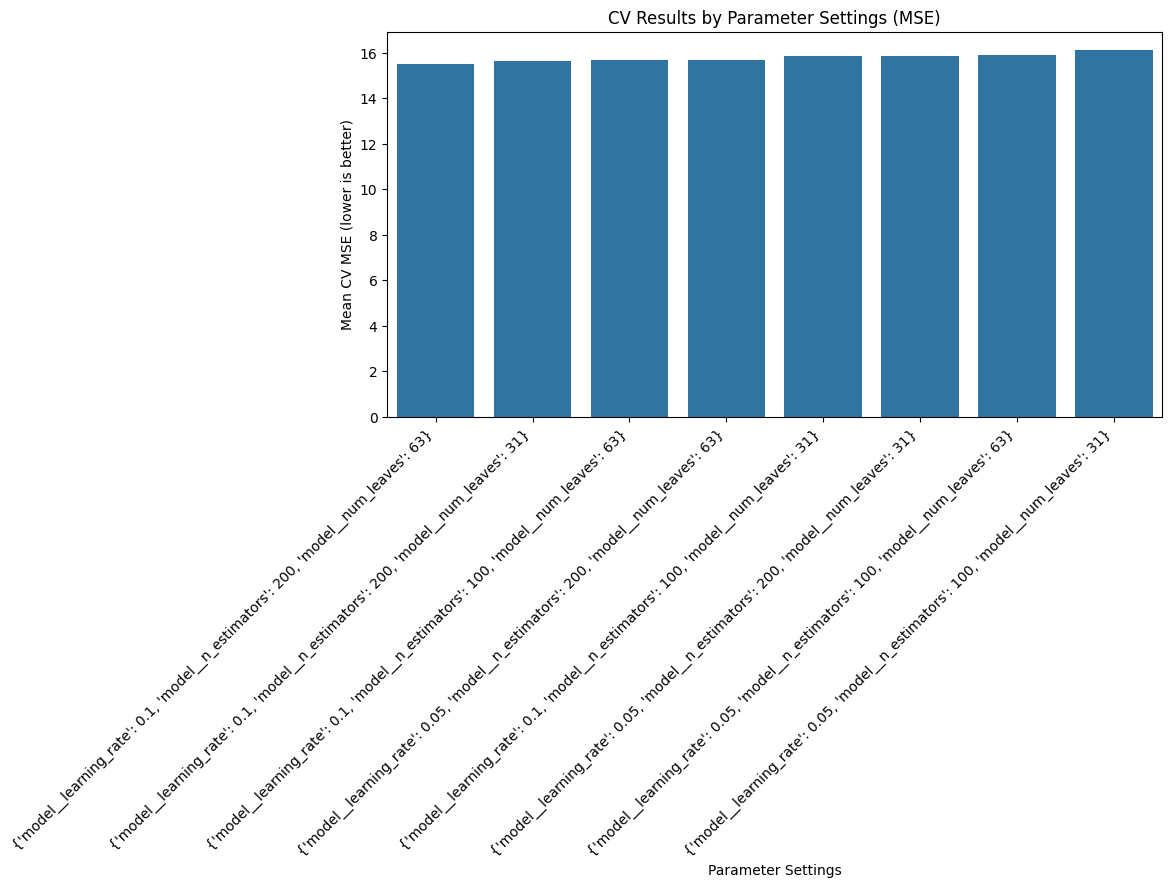

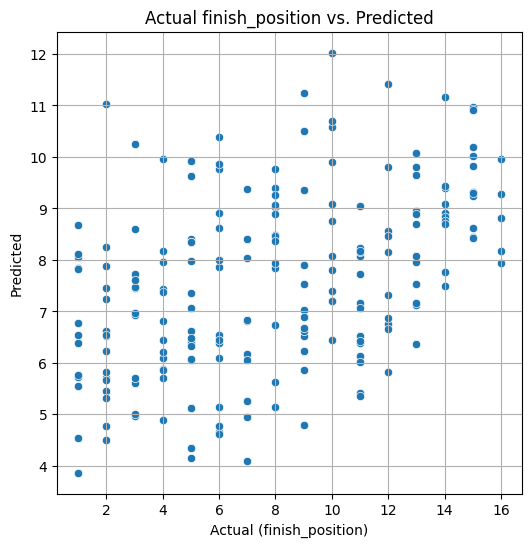

['trained_model_2.pkl']

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.142353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76917
[LightGBM] [Info] Number of data points in the train set: 1289516, number of used features: 38341
[LightGBM] [Info] Start training from score 7.436642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.294164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76967
[LightGBM] [Info] Number of data points in the train set: 1289518, number of used features: 38367
[LightGBM] [Info] Start training from score 7.436644
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.314298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76811
[LightGBM] [Info] Number of data points in 

In [16]:
# ========== メインフロー (例) ==========

# 1) 前処理
df_processed = preprocess_data(df_raceResult)

# 2) 特徴量抽出 & ターゲット取得
X, y, groups = select_features_and_target(df_processed)

# 3) パイプライン構築
pipeline = build_pipeline(X)

# 4) GroupKFold 5分割
gkf = GroupKFold(n_splits=5)

# 5) ハイパーパラメータサーチの設定
param_grid = {
    "model__n_estimators": [100, 200],
    "model__learning_rate": [0.05, 0.1],
    "model__num_leaves": [31, 63]
}

gsearch = GridSearchCV(
    pipeline, 
    param_grid, 
    scoring='neg_mean_squared_error', 
    cv=gkf, 
    n_jobs=-1, 
    verbose=1
)
gsearch.fit(X, y, groups=groups)

print("Best params:", gsearch.best_params_)
print("Best CV MSE:", -gsearch.best_score_)

# 6) CV結果の可視化
visualize_cv_results(gsearch)

# 7) ベストモデルで予測
best_model = gsearch.best_estimator_
y_pred = best_model.predict(X)

# 8) 予測と実際の着順の可視化
visualize_predictions(y, y_pred, num_samples=200)

# 9) モデル保存(任意)
joblib.dump(best_model, "trained_model_2.pkl")

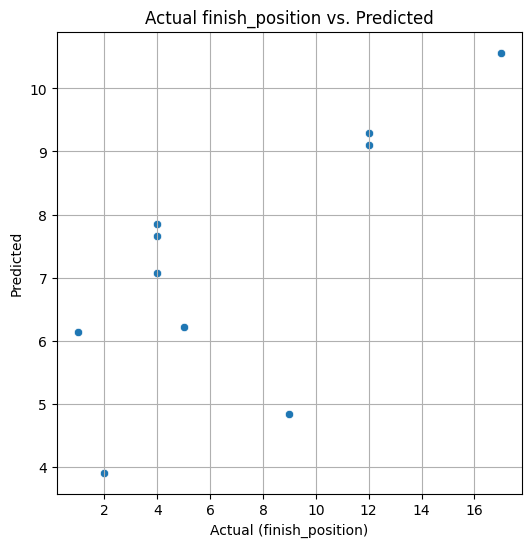

In [19]:
# 8) 予測と実際の着順の可視化
visualize_predictions(y, y_pred, num_samples=10)
